# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset without Normalization

In [15]:
# Define transforms
transform = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor()])
# Create training set and define training dataloader
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

# Create test set and define test dataloader
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)
# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset

In [16]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

dog


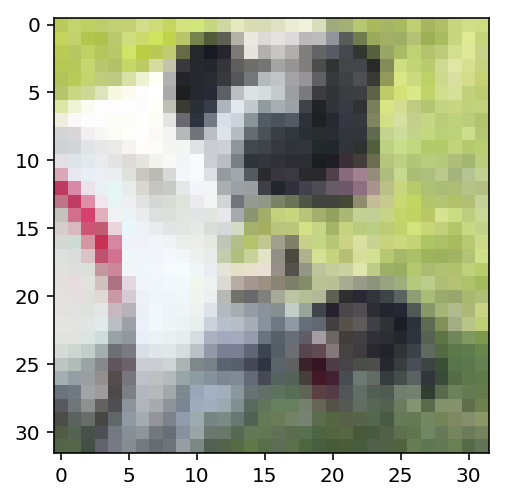

horse


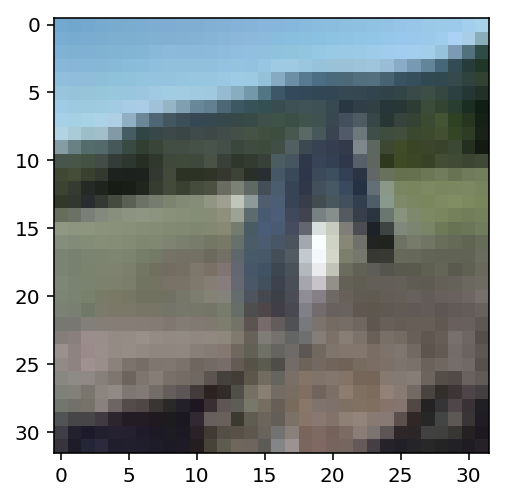

dog


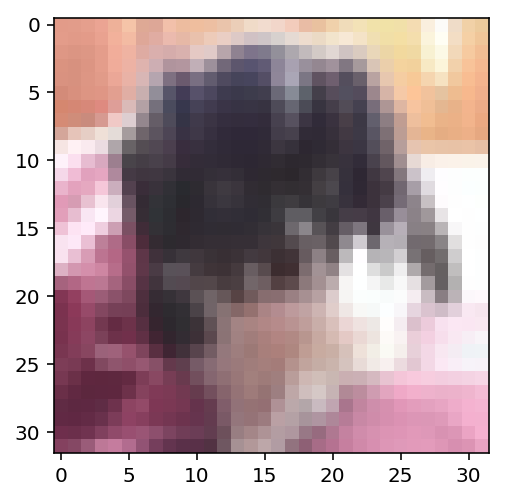

dog


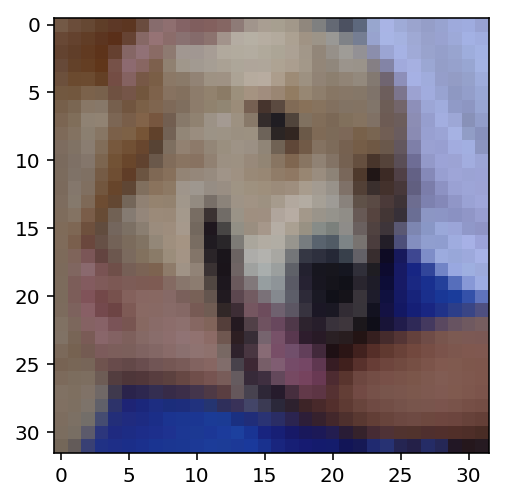

deer


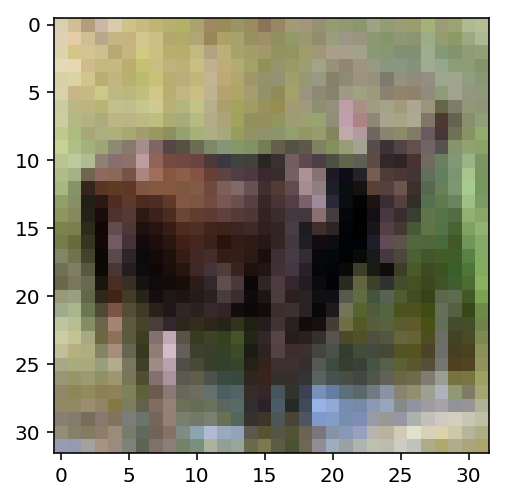

In [17]:
# Explore data
# Note that I have changed the transforms to be unnormalized (then I have add transform.Normalize)
show5(trainloader)

In [18]:
# we can see here we have 50000 images that are 32*32 and 3 RGB(colored)
trainloader.dataset.train_data.shape

(50000, 32, 32, 3)

## Load the Dataset with Normalization
Suddenly I couldn't find a proper way to normalize the dataset

In [19]:
# Define transforms
transform = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Create training set and define training dataloader
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

# Create test set and define test dataloader
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)
# The 10 classes in the dataset

Files already downloaded and verified
Files already downloaded and verified


## Build your Neural Network


In [7]:
import torch.nn
import torch.nn.functional as F

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(3072,1024)
        self.fc2=nn.Linear(1024,512)
        self.fc3=nn.Linear(512,256)
        self.fc4=nn.Linear(256,64)
        self.fc5=nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self,x):
        
       
        x=x.view(x.shape[0],-1)

        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.dropout(F.relu(self.fc3(x)))
        x=self.dropout(F.relu(self.fc4(x)))
    
        x=F.log_softmax(self.fc5(x), dim=1)
        
        return x
                
        
        

In [20]:
import torch.nn
import torch.nn.functional as F

class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super(ConvolutionalNetwork,self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1=nn.Linear(128*4*4,1024)
        self.fc2=nn.Linear(1024,512)
        self.fc3=nn.Linear(512,256)
        self.fc4=nn.Linear(256,64)
        self.fc5=nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self,x):
        
       
        
        
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.conv3(x)))
        
        x=x.view(x.shape[0],-1)
      
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.dropout(F.relu(self.fc3(x)))
        x=self.dropout(F.relu(self.fc4(x)))
    
        x=F.log_softmax(self.fc5(x), dim=1)
        
        return x
                
        
        

In [21]:
convolutional_model=ConvolutionalNetwork()
criterion = nn.NLLLoss()
optimizer = optim.SGD(convolutional_model.parameters(), lr=0.004)

In [10]:
model=Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.004)

## Regular Neural Network


I chose randomly 200 epochs to address the probelms of overfiting in practice and that the more epochs doesn't mean better training

In [11]:
device = 'cuda'
model.to(device)
    
epochs=200
train_losses=[]
test_losses=[]

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)
            
        output=model(images)
        loss=criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
         
                images, labels = images.to(device), labels.to(device)
            
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class == labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/200..  Training Loss: 2.301..  Test Loss: 2.297..  Test Accuracy: 0.119
Epoch: 2/200..  Training Loss: 2.292..  Test Loss: 2.283..  Test Accuracy: 0.185
Epoch: 3/200..  Training Loss: 2.271..  Test Loss: 2.246..  Test Accuracy: 0.203
Epoch: 4/200..  Training Loss: 2.206..  Test Loss: 2.140..  Test Accuracy: 0.235
Epoch: 5/200..  Training Loss: 2.095..  Test Loss: 2.024..  Test Accuracy: 0.262
Epoch: 6/200..  Training Loss: 2.017..  Test Loss: 1.953..  Test Accuracy: 0.282
Epoch: 7/200..  Training Loss: 1.961..  Test Loss: 1.900..  Test Accuracy: 0.305
Epoch: 8/200..  Training Loss: 1.914..  Test Loss: 1.851..  Test Accuracy: 0.327
Epoch: 9/200..  Training Loss: 1.873..  Test Loss: 1.809..  Test Accuracy: 0.342
Epoch: 10/200..  Training Loss: 1.837..  Test Loss: 1.771..  Test Accuracy: 0.363
Epoch: 11/200..  Training Loss: 1.802..  Test Loss: 1.730..  Test Accuracy: 0.381
Epoch: 12/200..  Training Loss: 1.768..  Test Loss: 1.690..  Test Accuracy: 0.397
Epoch: 13/200..  Training

Epoch: 102/200..  Training Loss: 0.812..  Test Loss: 1.266..  Test Accuracy: 0.585
Epoch: 103/200..  Training Loss: 0.803..  Test Loss: 1.230..  Test Accuracy: 0.593
Epoch: 104/200..  Training Loss: 0.795..  Test Loss: 1.200..  Test Accuracy: 0.599
Epoch: 105/200..  Training Loss: 0.793..  Test Loss: 1.231..  Test Accuracy: 0.584
Epoch: 106/200..  Training Loss: 0.789..  Test Loss: 1.218..  Test Accuracy: 0.591
Epoch: 107/200..  Training Loss: 0.781..  Test Loss: 1.259..  Test Accuracy: 0.585
Epoch: 108/200..  Training Loss: 0.776..  Test Loss: 1.228..  Test Accuracy: 0.592
Epoch: 109/200..  Training Loss: 0.773..  Test Loss: 1.262..  Test Accuracy: 0.578
Epoch: 110/200..  Training Loss: 0.765..  Test Loss: 1.297..  Test Accuracy: 0.573
Epoch: 111/200..  Training Loss: 0.759..  Test Loss: 1.284..  Test Accuracy: 0.580
Epoch: 112/200..  Training Loss: 0.752..  Test Loss: 1.226..  Test Accuracy: 0.591
Epoch: 113/200..  Training Loss: 0.747..  Test Loss: 1.235..  Test Accuracy: 0.588
Epoc

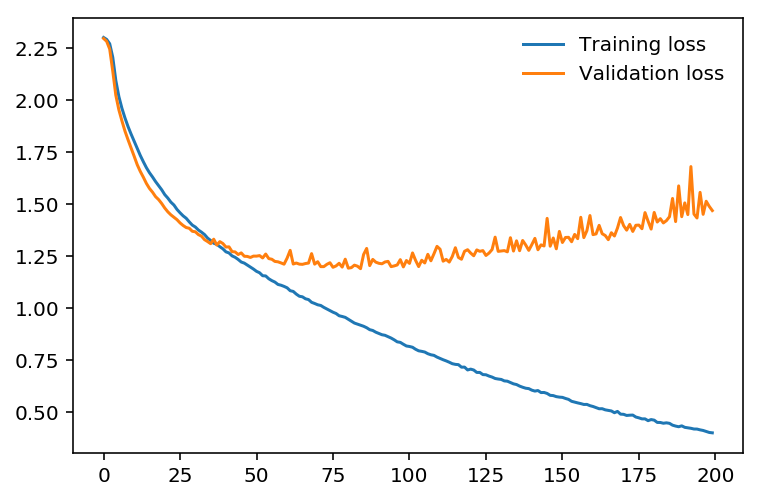

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

obviously its overfited the data and if you deep down towards the Test Loss you can see that after 50 epochs we sholud have stopped the training to avoid such a probelm since the Test accuracy haven't exceeded as expected to

## Convolutional Neural Network


In [22]:
device = 'cuda'
convolutional_model.to(device)
    
epochs=100
train_losses=[]
test_losses=[]

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)
            
        output=convolutional_model(images)
        loss=criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            convolutional_model.eval()
            for images,labels in testloader:
         
                images, labels = images.to(device), labels.to(device)
            
                log_ps=convolutional_model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class == labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        convolutional_model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/100..  Training Loss: 2.304..  Test Loss: 2.304..  Test Accuracy: 0.100
Epoch: 2/100..  Training Loss: 2.303..  Test Loss: 2.303..  Test Accuracy: 0.100
Epoch: 3/100..  Training Loss: 2.303..  Test Loss: 2.303..  Test Accuracy: 0.100
Epoch: 4/100..  Training Loss: 2.303..  Test Loss: 2.302..  Test Accuracy: 0.100
Epoch: 5/100..  Training Loss: 2.302..  Test Loss: 2.302..  Test Accuracy: 0.100
Epoch: 6/100..  Training Loss: 2.302..  Test Loss: 2.302..  Test Accuracy: 0.101
Epoch: 7/100..  Training Loss: 2.302..  Test Loss: 2.302..  Test Accuracy: 0.100
Epoch: 8/100..  Training Loss: 2.302..  Test Loss: 2.302..  Test Accuracy: 0.103
Epoch: 9/100..  Training Loss: 2.302..  Test Loss: 2.301..  Test Accuracy: 0.128
Epoch: 10/100..  Training Loss: 2.301..  Test Loss: 2.301..  Test Accuracy: 0.161
Epoch: 11/100..  Training Loss: 2.301..  Test Loss: 2.301..  Test Accuracy: 0.182
Epoch: 12/100..  Training Loss: 2.301..  Test Loss: 2.300..  Test Accuracy: 0.207
Epoch: 13/100..  Training

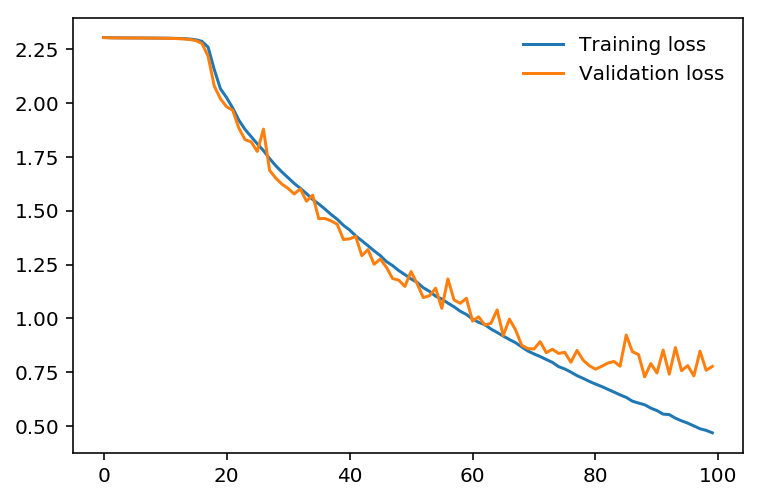

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

It is clear that there is no gap between the validation loss and training loss 

## Testing your model
Suddenly I couldn't find a proper when to unnormalize 

In [27]:
# Define transforms
transform = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor()])
# Create training set and define training dataloader
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

# Create test set and define test dataloader
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


ship


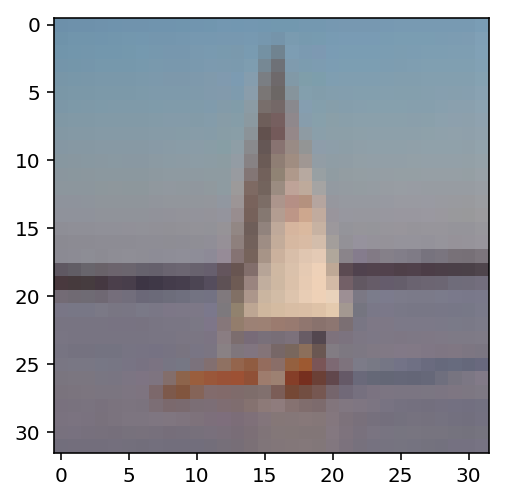

In [29]:
device = 'cuda'
model.to(device)


model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)
First_image = images[1]
First_label=labels[1]

First_image = First_image.view(1, 3072)

with torch.no_grad():
    output = model.forward(First_image)

ps = torch.exp(output)


print(classes[First_label])


image = images[1].cpu().data.numpy()
plt.imshow(np.rot90(image.T, k=3))
plt.show()

The images is for a ship and the predicted result is a ship

## Saving your model


In [31]:
checkpoint = {'input_size': 3072,
              'output_size': 10,
              'hidden_layers1': 1024,
              'hidden_layers2': 512,
              'hidden_layers3': 256,
              'hidden_layers3': 64,
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?

* The model achieves %55.4 accuracy which is less accurate than Detectocorp's model (%70)
* In comparison with the advance solutions, I can say the its much worst
* I have achieved the accuracy by having 4 hidden layers and by choosing SGD as optimizer, nn.NLLLoss() as loss function, and RandomHorizontalFlip() as augmentation technique
* It is necessary to improve the accuracy howerver, I have tried bunch of ways to improve it but none of them worked due to limited resourses


If it was my choice I will buy Detectocorp's model to save the efforts and to put them in another place
